In [16]:
# Add RMExtract to Python path
import sys
RMEXTRACT_PATH = '../RMextract'
sys.path.append(RMEXTRACT_PATH)

In [2]:
#snippet to set notebook to screen width

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

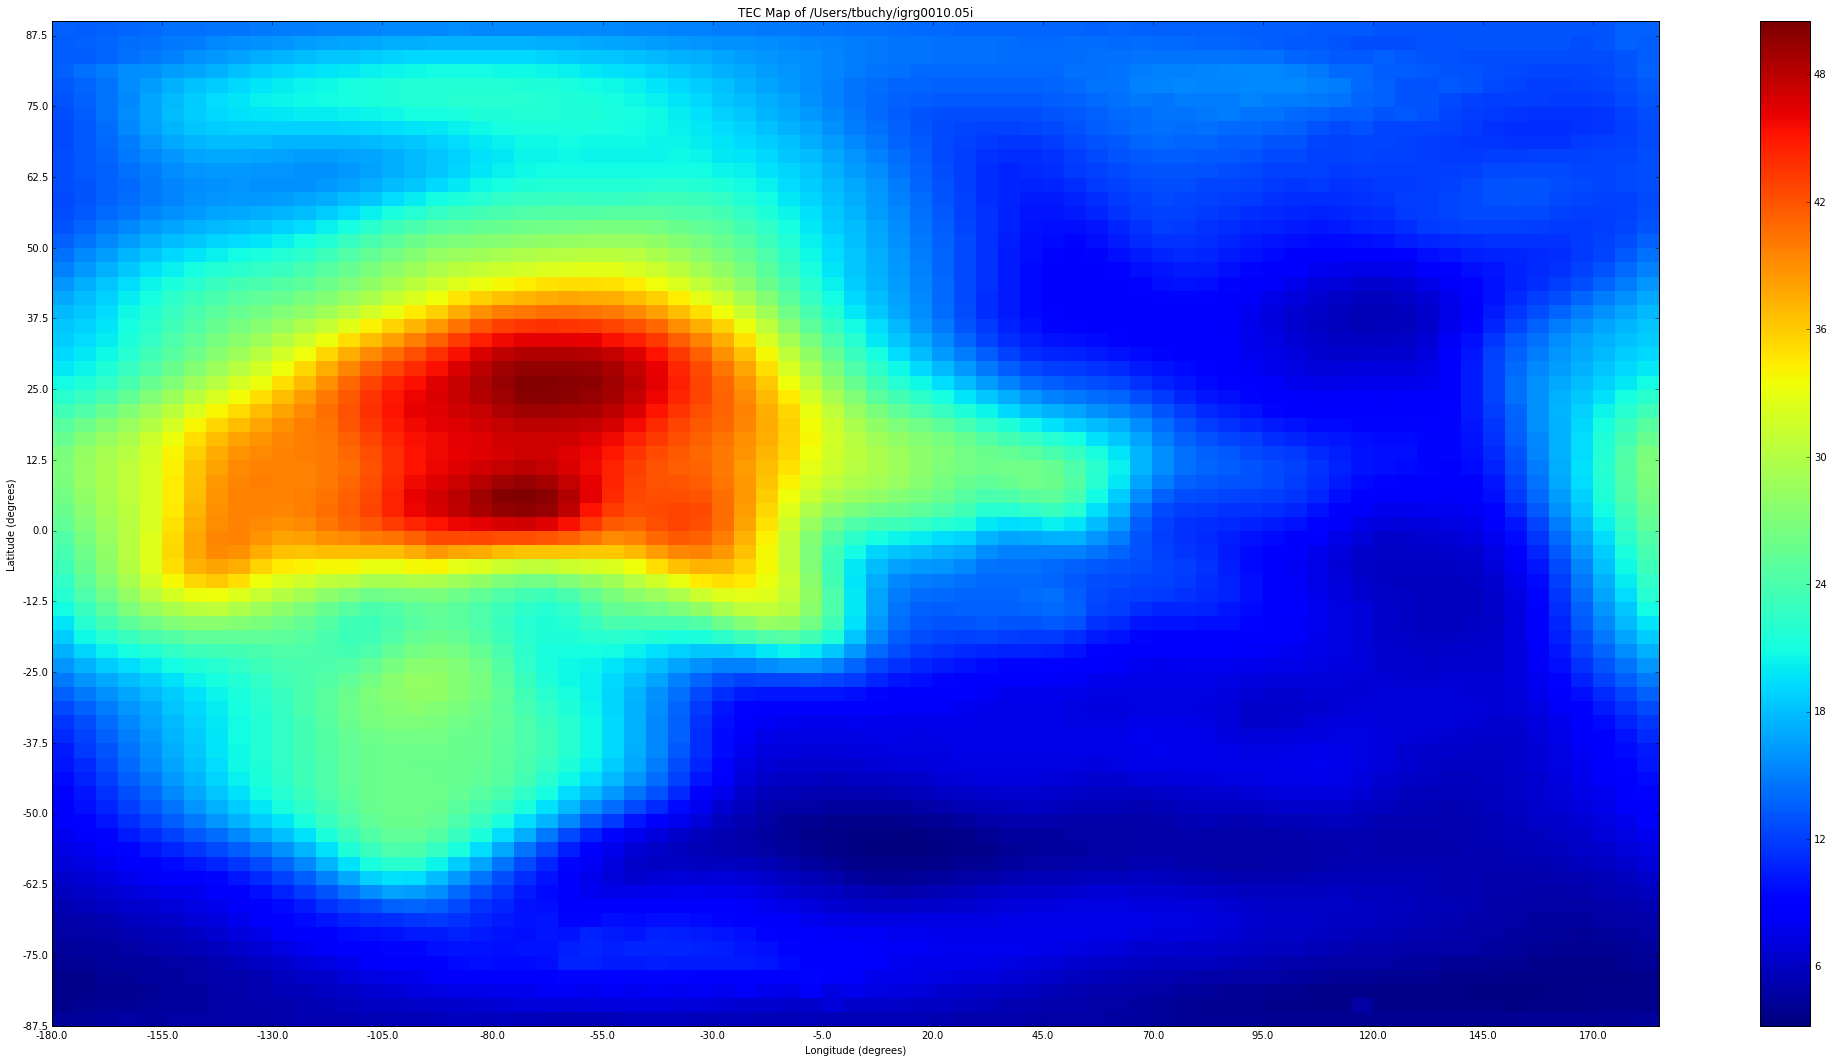

In [182]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
PATH_TO_IONEX = '/Users/tbuchy/igrg0010.05i'

def generate_tec_map(path_to_ionex, hour_in_day):
    """
    Function to generate tec maps!
    """
    tec_struct = ionex.readTEC(PATH_TO_IONEX) # some data struct is returned from the library.
    tec_data = tec_struct[0]

    LAT_STEP_SIZE = 2.5
    LON_STEP_SIZE = 5.0

    MAX_LAT = 180
    MIN_LAT = 0

    MAX_LON = 360
    MIN_LON = 0

    hours = np.arange(0, 25, 2) # 24 hours, 2 hour steps
    lat_v = np.arange(MIN_LAT + LAT_STEP_SIZE, MAX_LAT, LAT_STEP_SIZE) # Starts at 2.5 degrees (87.5)
    lon_v = np.arange(MIN_LON, MAX_LON + LON_STEP_SIZE, LON_STEP_SIZE)
    interpolator = RegularGridInterpolator((hours, lat_v, lon_v), tec_data, bounds_error=False)

    tecs = np.zeros((len(lat_v), len(lon_v)))
    for i, lat in enumerate(lat_v):
        for j, lon in enumerate(lon_v):
            tec = interpolator(np.array([hour_in_day, lat, lon]))
            tecs[i, j] = tec

    AXIS_STEP = 5
    plt.figure(figsize=(36, 18))
    plt.title("TEC Map of {}".format(PATH_TO_IONEX))
    plt.ylabel("Latitude (degrees)")
    plt.yticks(range(len(lat_v))[::AXIS_STEP], lat_v[::AXIS_STEP]-90) # reverse the array so lats count down

    plt.xlabel("Longitude (degrees)")
    plt.xticks(range(len(lon_v))[::AXIS_STEP], lon_v[::AXIS_STEP]-180)

    heatmap = plt.pcolor(tecs)
    plt.colorbar()
    plt.show()
    
    return tecs

# Play with tecs here if you need!
tecs = generate_tec_map(PATH_TO_IONEX, 20)